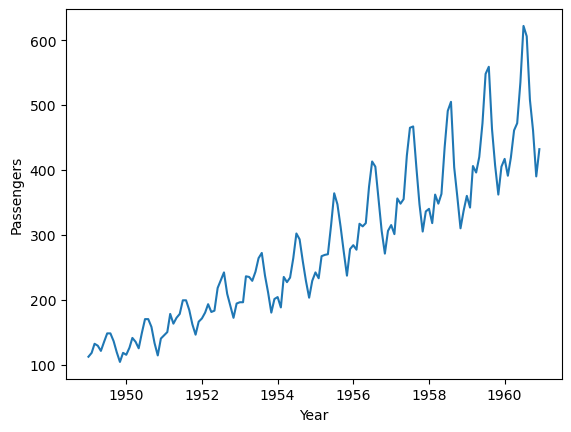

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("AirPassengers.csv")

# Convert the date column to a datetime object
data['Month'] = pd.to_datetime(data['Month'])

# Set the date column as the index
data.set_index('Month', inplace=True)

# Plot the time series
plt.plot(data)
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.show()

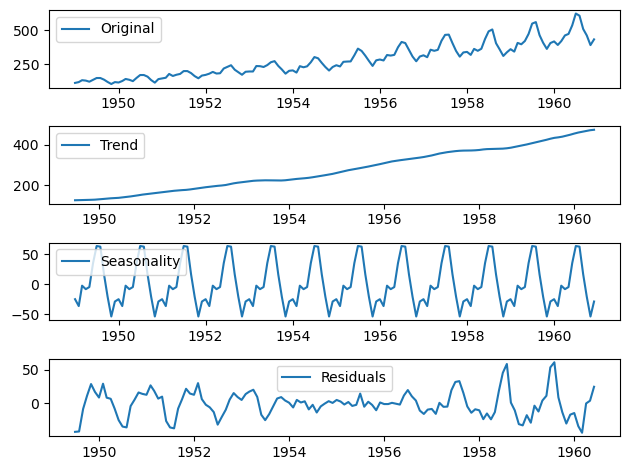

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(data)

# Plot the decomposition
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(data, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


In [6]:
from statsmodels.tsa.stattools import adfuller

# ADF test for stationarity
result = adfuller(data['#Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: 0.8153688792060502
p-value: 0.991880243437641
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


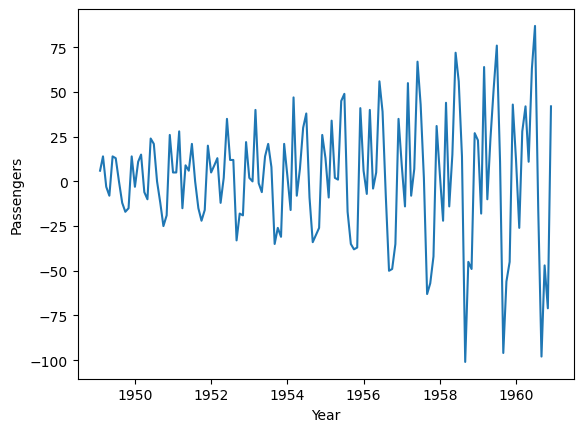

In [7]:
# Take the first difference
data_diff = data.diff().dropna()

# Plot the differenced time series
plt.plot(data_diff)
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.show()

In [11]:
# ADF test for stationarity
result = adfuller(data_diff['#Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.829266824170006
p-value: 0.05421329028382468
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [19]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(data, order=(1,1,1))
model_fit = model.fit()

# Make predictions for the next 12 months
forecast = model_fit.forecast(steps=12)

# Print the forecasted sales data
print(forecast)


C:\Users\rajvi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\rajvi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\rajvi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1961-01-01    475.735059
1961-02-01    454.996073
1961-03-01    464.830415
1961-04-01    460.167010
1961-05-01    462.378378
1961-06-01    461.329756
1961-07-01    461.827008
1961-08-01    461.591213
1961-09-01    461.703026
1961-10-01    461.650005
1961-11-01    461.675148
1961-12-01    461.663225
Freq: MS, Name: predicted_mean, dtype: float64


In [20]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Mon, 20 Feb 2023   AIC                           1394.683
Time:                        19:52:16   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0